In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../../pyscan/')

import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np


Could not load Keysight SD1
Could not load Keysight SD1
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBSC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [4]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()

In [5]:
def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v+i for i in range(5)]
    d.x3 = [[v+i+j for i in range(5)] for j in range(5)]
    
    return d

# 1D Scan 0D Data

In [6]:
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.1)
# runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


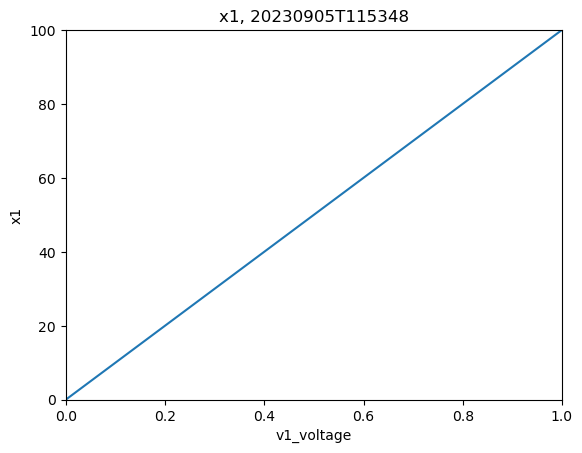

In [7]:
ps.live_plot1D(expt, data_name='x1')

# 1D Scan 1D Data

In [8]:
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.1)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


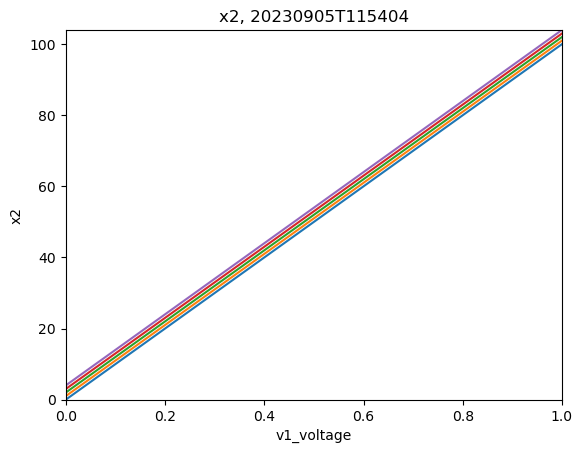

In [9]:
ps.live_plot1D(expt, data_name='x2')

# 1D Scan 2D Data

In [10]:
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.1)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


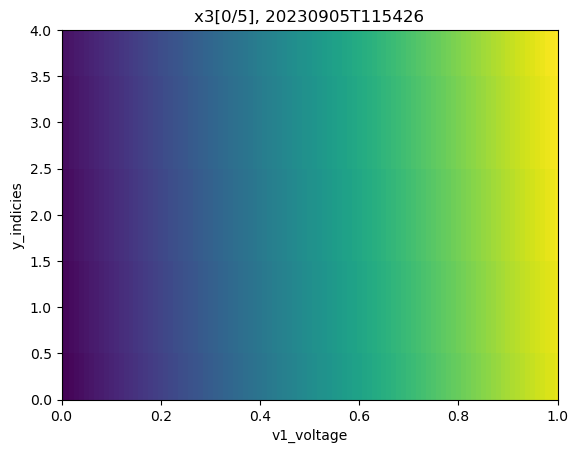

In [11]:
ps.live_plot2D(expt, data_name='x3')

# 2D Scan 0D Data

In [12]:
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.1)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


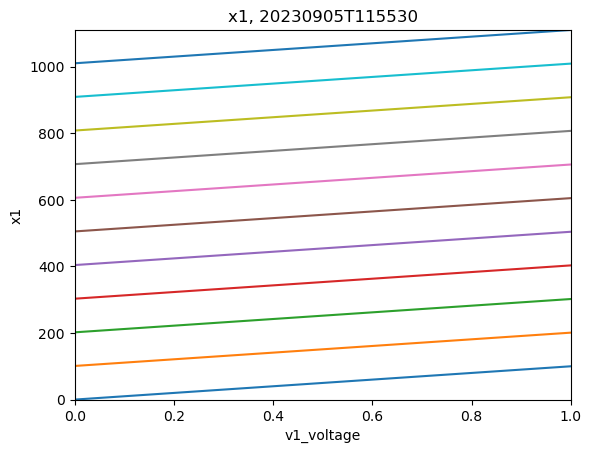

In [13]:
ps.live_plot1D(expt, data_name='x1')

In [14]:
runinfo = ps.RunInfo()

runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.01, 1)}, prop='voltage', dt=0.1)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.1, 1)}, prop='voltage')

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


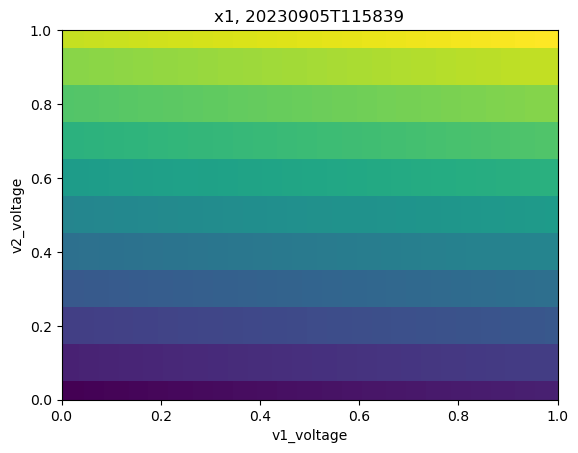

In [15]:
ps.live_plot2D(expt, data_name='x1')